### Dataset Overview
The dataset contains transactions made by credit cards in September of 2013 by European cardholders. This dataset presents transactions that occurred within a two day period. A link to the dataset can be found below:

https://www.kaggle.com/mlg-ulb/creditcardfraud

The dataset contains **284807 observations across 31 columns**. All columns, with the exception of 'Time', 'Amount', and 'Class' have been censored due to confidentiality issues.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

### Read the data in and get a feel for its statistical properties

In [3]:
fraud = pd.read_csv('creditcard.csv')

In [6]:
fraud.shape

(284807, 31)

In [4]:
fraud.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory Analysis

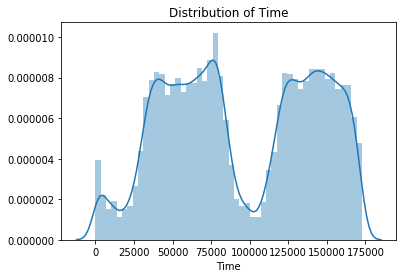

In [10]:
#First look at Time
sns.distplot(fraud.Time)
plt.title('Distribution of Time')
plt.show()

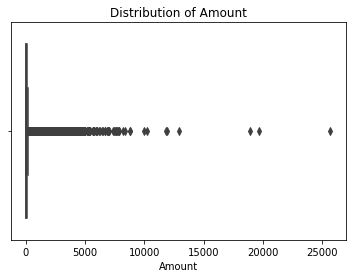

In [12]:
#Now look at Amount
sns.boxplot(x=fraud['Amount'])
plt.title('Distribution of Amount')
plt.show()

In [9]:
fraud_total = fraud['Class'].sum()
print('Baseline accuracy for fraud is: ' + str(round((fraud_total/fraud.shape[0])*100, 2)) + '%')

Baseline accuracy for fraud is: 0.17%


### We are dealing with an extremely unbalanced dataset. Approximately 99.83% of transactions are not fraudulent. Therefore, our model must be record higher accuracy than 99.83% in order to improve from the baseline. 

**Start with KNN Classifier**

In [13]:
#Set up our independent variables and outcome variable

X = fraud.iloc[:,0:30]
Y = fraud.Class

In [37]:
#Setup function to run our model with different k parameters

def KNN_Model(k):
    KNN = KNeighborsClassifier(n_neighbors=k, weights='distance')
    KNN.fit(X, Y)
    print('\n Percentage accuracy for K Nearest Neighbors Classifier')
    print(str(KNN.score(X, Y)*100) + '%')
    print(cross_val_score(KNN, X, Y, cv=10))

In [38]:
#Run the model with K=10
KNN_Model(10)


 Percentage accuracy for K Nearest Neighbors Classifier
100.0%
[0.02489291 0.12060249 0.0672027  0.14360451 0.19051297 0.30674157
 0.27450843 0.33128511 0.34353933 0.99827949]


***Figure out how to do KNN Classifier cross validation above!

**Now, try Random Forest Classifier

In [29]:
#Set up function to run our model with different trees, criterion, max features and max depth

def RFC_Model(trees, criteria, num_features, depth):
    rfc = ensemble.RandomForestClassifier(n_estimators=trees, criterion=criteria, max_features=num_features, max_depth=depth)
    rfc.fit(X, Y)
    print('\n Percentage accuracy for Random Forest Classifier')
    print(str(rfc.score(X, Y)*100) + '%')
    print(cross_val_score(rfc, X, Y, cv=10))

In [30]:
#Run the model with 50 trees, criterion = 'entropy', max features = 5 and max depth = 5
RFC_Model(50, 'entropy', 5, 5)


 Percentage accuracy for Random Forest Classifier
99.95575951433779%
[0.99863071 0.99877115 0.99982444 0.99940311 0.999368   0.99894663
 0.99982444 0.99950843 0.99947331 0.99933287]


In [36]:
#Try RFC again, same parameters accept use 'gini' instead of 'entropy' for criterion
RFC_Model(50, 'gini', 5, 5)


 Percentage accuracy for Random Forest Classifier
99.95330170957877%
[0.99856049 0.99873604 0.99982444 0.99922756 0.999368   0.99891152
 0.99982444 0.99933287 0.99936798 0.9991573 ]


**Next, try different flavors of logistic regression**

In [33]:
#Set up function to run our model using lasso or ridge regularization and specifying alpha
#parameter

def Logistic_Reg_Model(regularization, alpha):
    lr = LogisticRegression(penalty=regularization, C=alpha)
    lr.fit(X, Y)
    print('\n Percentage accuracy for Logistic Regression')
    print(str(lr.score(X, Y)*100) + '%')
    print(cross_val_score(lr, X, Y, cv=10))

In [34]:
#Run using 'l1' (lasso) penalty and 0.8 alpha
Logistic_Reg_Model('l1', 0.8)


 Percentage accuracy for Logistic Regression
99.92029690281488%
[0.99870093 0.99887648 0.99971911 0.99898178 0.99884133 0.99912219
 0.99961376 0.99908708 0.99922753 0.99901685]


In [35]:
#Run using 'l2' (ridge) penalty and 100 alpha
Logistic_Reg_Model('l2', 100)


 Percentage accuracy for Logistic Regression
99.90239003957065%
[0.98416544 0.99961379 0.999684   0.99940311 0.99887644 0.99908708
 0.99964888 0.99877107 0.99891152 0.99873596]


**Finally, try SVM

In [ ]:
svm = SVC()
svm.fit(X, Y)
print(str(svm.score(X, Y)*100) + '%')